<a href="https://colab.research.google.com/github/CardosoJr/bootcamp/blob/main/Labs/Lab%201%20-%20pre_processing_airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1 - Data Cleaning & Pre-processing

## **Conjunto de Dados**

Vamos trabalhar com o conjunto de dados do Airbnb. Abaixo uma descrição de cada coluna:

- `listing_id`: Identificador único da acomodação
- `description`: Descrição da acomodação
- `host_id`: Identificador único do host
- `host_name`: Nome do host
- `neighbourhood_full`: Nome da região
- `coordinates`: Coordenadas Lat/Lng da acomodação
- `Listing added`: Data que acomodação foi publibicada
- `room_type`: Tipo de quarto
- `rating`: Avaliação de 0 a 5.
- `price`: Preço por noite
- `number_of_reviews`: Quantidade de avaliações
- `last_review`: Data da última avaliação
- `reviews_per_month`: Quantidade de avaliações por mês
- `availability_365`: Quantidade de dias disponível por ano
- `Number of stays`: Quantidade de hospedagens até o momento


## **Importando Bibliotecas e Lendo Dados**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('https://github.com/adelnehme/python-for-spreadsheet-users-webinar/blob/master/datasets/airbnb.csv?raw=true', index_col = 'Unnamed: 0')

## **Data Overview**

In [ ]:
df.head()

,listing_id,name,host_id,host_name,neighbourhood_full,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands","(40.63222, -73.93398)",Private room,45$,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side","(40.78761, -73.96862)",Entire home/apt,135$,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights","(40.7007, -73.99517)",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15
3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side","(40.79169, -73.97498)",Entire home/apt,86$,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side","(40.71884, -73.98354)",Private room,160$,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23


Somente olhando para os dados, já podemos perceber alguns potenciais problemas/oportunidades:
1. Colunas `coordinates` e `price` provavelmente estão como tipo string
2. Provavelmente deveremos transformar as colunas `last_review` e `listing_added`
3. Alguns valores faltantes
4. A coluna `neighbourhood_full` é composta de Região + Bairro, podemos pensar em fazer o split dessa coluna em duas.

Abaixo faremos mais análises gerais para confirmar esses itens e verificar se existem mais problemas.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10019 entries, 0 to 10018
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   listing_id          10019 non-null  int64  
 1   name                10014 non-null  object 
 2   host_id             10019 non-null  int64  
 3   host_name           10017 non-null  object 
 4   neighbourhood_full  10019 non-null  object 
 5   coordinates         10019 non-null  object 
 6   room_type           10019 non-null  object 
 7   price               9781 non-null   object 
 8   number_of_reviews   10019 non-null  int64  
 9   last_review         7944 non-null   object 
 10  reviews_per_month   7944 non-null   float64
 11  availability_365    10019 non-null  int64  
 12  rating              7944 non-null   float64
 13  number_of_stays     7944 non-null   float64
 14  5_stars             7944 non-null   float64
 15  listing_added       10019 non-null  object 
dtypes: float6

Pelo `info` podemos confirmar os itens 1 e 2. Também podemos verificar que existem valores falantes nas colunas `price`, `last_review`, `reviews_per_month`, `rating`, `number_of_stays` e `5_stars`.

Podemos também verificar que existe alguma provável relação nos valores faltantes uma vez que `last_review`, `reviews_per_month`, `rating`, `number_of_stays` e `5_stars` possuem a mesma quantidade de dados faltantes.

Abaixo vamos mostrar a proporção de missing em todas as colunas.

In [ ]:
df.isna().mean()

listing_id            0.000000
name                  0.000499
host_id               0.000000
host_name             0.000200
neighbourhood_full    0.000000
coordinates           0.000000
room_type             0.000000
price                 0.023755
number_of_reviews     0.000000
last_review           0.207106
reviews_per_month     0.207106
availability_365      0.000000
rating                0.207106
number_of_stays       0.207106
5_stars               0.207106
listing_added         0.000000
dtype: float64

Uma forma mais elegante de apresentar o resultado acima:

In [ ]:
(df
 .isna()
 .mean()
 .sort_values(ascending = False)
 .reset_index()
 .rename(columns = {0 : 'Missing', 'index' : 'Coluna'})
 .query("Missing > 0")
 .style
 .format('{:.2%}', subset = ['Missing'])
)

,Coluna,Missing
0,last_review,20.71%
1,reviews_per_month,20.71%
2,rating,20.71%
3,number_of_stays,20.71%
4,5_stars,20.71%
5,price,2.38%
6,name,0.05%
7,host_name,0.02%


Vamos continuar explorando nossos dados.

In [ ]:
df.describe()

,listing_id,host_id,number_of_reviews,reviews_per_month,availability_365,rating,number_of_stays,5_stars
count,1.001900e+04,1.001900e+04,10019.000000,7944.000000,10019.000000,7944.000000,7944.000000,7944.000000
mean,1.927634e+07,6.795923e+07,22.459727,1.353894,112.284260,4.014458,33.991541,0.718599
std,1.095056e+07,7.863106e+07,43.173896,1.615380,131.636043,0.575064,56.089279,0.079978
min,3.831000e+03,2.787000e+03,0.000000,0.010000,0.000000,3.000633,1.200000,0.600026
25%,9.674772e+06,7.910880e+06,1.000000,0.200000,0.000000,3.520443,3.600000,0.655576
50%,2.007030e+07,3.165167e+07,5.000000,0.710000,44.000000,4.027965,10.800000,0.709768
75%,2.933864e+07,1.074344e+08,22.000000,2.000000,226.000000,4.516378,38.400000,0.763978
max,3.648724e+07,2.741034e+08,510.000000,16.220000,365.000000,5.181114,612.000000,0.950339


Agora podemos verificar mais alguns itens:
5. Vemos que o máximo da coluna `rating` é maior que 5, o que indica um valor inconsistente.
6. Vemos que o máximo da quantidade de reviews é 510, enquanto o percentil 75% é 22, o que indica um provável outlier. O mesmo ocorre para a coluna `number_of_stays`.

### Uma análise mais detalhada das colunas

In [ ]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Private', 'Shared room',
       'PRIVATE ROOM', 'home', '   Shared room      '], dtype=object)


Outro problema:
7. Temos algumas categorias duplicadas na coluna `room_type`

In [ ]:
df['room_type'].value_counts()

room_type
Entire home/apt         5120
Private room            4487
Shared room              155
Private                   89
   Shared room            71
home                      66
PRIVATE ROOM              31
Name: count, dtype: int64

In [ ]:
df['number_of_reviews'].quantile([0.90, 0.95, 0.99, 1.0])

0.90     67.00
0.95    111.00
0.99    212.64
1.00    510.00
Name: number_of_reviews, dtype: float64

In [ ]:
df['number_of_stays'].quantile([0.90, 0.95, 0.99, 1.0])

0.90     96.000
0.95    151.200
0.99    273.084
1.00    612.000
Name: number_of_stays, dtype: float64

de fato podemos confirmar o **item 6** mapeado anteriormente. Existem alguns valores extremos nas colunas `number_of_reviews` e `number_of_stays`. Podemos considerá-los outliers?

### Verificando duplicatas

In [ ]:
df.duplicated().sum()

13

In [ ]:
df.duplicated(subset = ['listing_id']).sum()

20

In [ ]:
df = df.drop_duplicates(subset = ['listing_id'])

## **Cleaning data**

### Problemas de Tipo de Dados

##### Coluna Coordinates

In [ ]:
df.loc[:,'coordinates'] = df['coordinates'].str.replace("(","")
df.loc[:,'coordinates'] = df['coordinates'].str.replace(")","")
df['coordinates'].head()

0    40.63222, -73.93398
1    40.78761, -73.96862
2     40.7007, -73.99517
3    40.79169, -73.97498
4    40.71884, -73.98354
Name: coordinates, dtype: object

In [ ]:
lat_long = df['coordinates'].str.split(",", expand = True)
lat_long.head()

,0,1
0,40.63222,-73.93398
1,40.78761,-73.96862
2,40.7007,-73.99517
3,40.79169,-73.97498
4,40.71884,-73.98354


In [ ]:
df.loc[:,'latitude'] = lat_long[0]
df.loc[:,'longitude'] = lat_long[1]
df.head()

,listing_id,name,host_id,host_name,neighbourhood_full,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands","40.63222, -73.93398",Private room,45$,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08,40.63222,-73.93398
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side","40.78761, -73.96862",Entire home/apt,135$,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25,40.78761,-73.96862
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights","40.7007, -73.99517",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15,40.7007,-73.99517
3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side","40.79169, -73.97498",Entire home/apt,86$,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20,40.79169,-73.97498
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side","40.71884, -73.98354",Private room,160$,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23,40.71884,-73.98354


In [ ]:
df.dtypes

listing_id              int64
name                   object
host_id                 int64
host_name              object
neighbourhood_full     object
coordinates            object
room_type              object
price                  object
number_of_reviews       int64
last_review            object
reviews_per_month     float64
availability_365        int64
rating                float64
number_of_stays       float64
5_stars               float64
listing_added          object
latitude               object
longitude              object
dtype: object

In [ ]:
df['latitude'] = df['latitude'].astype('float')
df['longitude'] = df['longitude'].astype('float')

In [ ]:
df.dtypes

listing_id              int64
name                   object
host_id                 int64
host_name              object
neighbourhood_full     object
coordinates            object
room_type              object
price                  object
number_of_reviews       int64
last_review            object
reviews_per_month     float64
availability_365        int64
rating                float64
number_of_stays       float64
5_stars               float64
listing_added          object
latitude              float64
longitude             float64
dtype: object

In [ ]:
df.drop('coordinates', axis = 1, inplace = True)

##### Coluna price

In [ ]:
df['price'].mean()

TypeError: can only concatenate str (not "int") to str

In [ ]:
df['price'] = df['price'].str.strip("$")
df['price'].head()

In [ ]:
df['price'] = df['price'].astype('float')
df['price'].mean()

150.68845405183896

##### Colunas `listing_added` e `last_review`

In [ ]:
df[['listing_added', 'last_review']].head()

,listing_added,last_review
0,2018-06-08,2018-12-12
1,2018-12-25,2019-06-30
2,2018-08-15,NaT
3,2017-03-20,2017-09-23
4,2020-10-23,2019-06-12


In [ ]:
df['listing_added'] = pd.to_datetime(df['listing_added'], format = '%Y-%m-%d')
df['last_review'] = pd.to_datetime(df['last_review'], format = '%Y-%m-%d')

##### Coluna `room_type`

In [ ]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Private', 'Shared room',
       'PRIVATE ROOM', 'home', '   Shared room      '], dtype=object)

In [ ]:
df['room_type'] = df['room_type'].str.lower()
df['room_type'].unique()

array(['private room', 'entire home/apt', 'private', 'shared room',
       'home', '   shared room      '], dtype=object)

In [ ]:
df['room_type'] = df['room_type'].str.strip()
df['room_type'].unique()

array(['private room', 'entire home/apt', 'private', 'shared room',
       'home'], dtype=object)

In [ ]:
mappings = {'private room': 'Private Room',
            'private': 'Private Room',
            'entire home/apt': 'Entire place',
            'shared room': 'Shared room',
            'home': 'Entire place'}

df['room_type'] = df['room_type'].replace(mappings)
df['room_type'].unique()

array(['Private Room', 'Entire place', 'Shared room'], dtype=object)

##### Coluna `neighbourhood_full`

In [ ]:
df['neighbourhood_full'].head()

0           Brooklyn, Flatlands
1    Manhattan, Upper West Side
2    Brooklyn, Brooklyn Heights
3    Manhattan, Upper West Side
4    Manhattan, Lower East Side
Name: neighbourhood_full, dtype: object

In [ ]:
district_neighbourhood = df['neighbourhood_full'].str.split(",", expand = True)
district_neighbourhood.head()

,0,1
0,Brooklyn,Flatlands
1,Manhattan,Upper West Side
2,Brooklyn,Brooklyn Heights
3,Manhattan,Upper West Side
4,Manhattan,Lower East Side


In [ ]:
df['district'] = district_neighbourhood[0]
df['neighbourhood'] = district_neighbourhood[1]
df[['neighbourhood_full', 'district', 'neighbourhood']].head()

,neighbourhood_full,district,neighbourhood
0,"Brooklyn, Flatlands",Brooklyn,Flatlands
1,"Manhattan, Upper West Side",Manhattan,Upper West Side
2,"Brooklyn, Brooklyn Heights",Brooklyn,Brooklyn Heights
3,"Manhattan, Upper West Side",Manhattan,Upper West Side
4,"Manhattan, Lower East Side",Manhattan,Lower East Side


In [ ]:
df.drop('neighbourhood_full', axis = 1, inplace = True)

In [ ]:
print(df['district'].unique())
print(df['neighbourhood'].unique())

['Brooklyn' 'Manhattan' 'Queens' 'Bronx' 'Staten Island']
[' Flatlands' ' Upper West Side' ' Brooklyn Heights' ' Lower East Side'
 ' Greenwich Village' ' Harlem' ' Sheepshead Bay' ' Theater District'
 ' Bushwick' ' Laurelton' ' Mott Haven' ' Flushing' ' Crown Heights'
 ' Midtown' ' Financial District' ' East Village' ' Park Slope'
 ' Washington Heights' ' Williamsburg' ' Chelsea' ' Bedford-Stuyvesant'
 ' Gowanus' ' Upper East Side' ' Ditmars Steinway' ' Cypress Hills'
 " Hell's Kitchen" ' Ridgewood' ' Marble Hill' ' Kips Bay'
 ' Prospect Heights' ' East New York' ' Concord' ' Stapleton' ' Astoria'
 ' East Harlem' ' Sunnyside' ' Gramercy' ' Prospect-Lefferts Gardens'
 ' Sunset Park' ' Forest Hills' ' Windsor Terrace' ' Clinton Hill'
 ' Murray Hill' ' Flatiron District' ' Greenpoint' ' East Flatbush'
 ' Tribeca' ' Woodhaven' ' Fort Greene' ' Inwood' ' Chinatown'
 ' Rockaway Beach' ' Woodside' ' Bayside' ' Bensonhurst' ' SoHo'
 ' Red Hook' ' West Village' ' South Slope' ' Richmond Hill' '

In [ ]:
df['neighbourhood'] = df['neighbourhood'].str.strip()
print(df['neighbourhood'].unique())

['Flatlands' 'Upper West Side' 'Brooklyn Heights' 'Lower East Side'
 'Greenwich Village' 'Harlem' 'Sheepshead Bay' 'Theater District'
 'Bushwick' 'Laurelton' 'Mott Haven' 'Flushing' 'Crown Heights' 'Midtown'
 'Financial District' 'East Village' 'Park Slope' 'Washington Heights'
 'Williamsburg' 'Chelsea' 'Bedford-Stuyvesant' 'Gowanus' 'Upper East Side'
 'Ditmars Steinway' 'Cypress Hills' "Hell's Kitchen" 'Ridgewood'
 'Marble Hill' 'Kips Bay' 'Prospect Heights' 'East New York' 'Concord'
 'Stapleton' 'Astoria' 'East Harlem' 'Sunnyside' 'Gramercy'
 'Prospect-Lefferts Gardens' 'Sunset Park' 'Forest Hills'
 'Windsor Terrace' 'Clinton Hill' 'Murray Hill' 'Flatiron District'
 'Greenpoint' 'East Flatbush' 'Tribeca' 'Woodhaven' 'Fort Greene' 'Inwood'
 'Chinatown' 'Rockaway Beach' 'Woodside' 'Bayside' 'Bensonhurst' 'SoHo'
 'Red Hook' 'West Village' 'South Slope' 'Richmond Hill' 'Jamaica'
 'Boerum Hill' 'St. George' 'Clason Point' 'College Point' 'Vinegar Hill'
 'Rego Park' 'East Elmhurst' 'Kensin

##### Coluna `rating`

In [ ]:
df[df['rating'] > 5.0]

,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,district,neighbourhood
1925,36411407,Brand new 1 bedroom steps from Soho!,33917435,Mike,Entire place,150.0,1,2019-07-06,1.0,13,5.017040,1.2,0.870161,2018-12-31,40.71825,-73.99019,Manhattan,Lower East Side
6732,36390226,Comfortable clean Bedstuy private room,267932490,Angela,Private Room,45.0,2,2019-07-08,2.0,14,5.087091,2.4,0.950339,2019-01-02,40.69551,-73.93951,Brooklyn,Bedford-Stuyvesant
8821,36413632,Spacious 2BR in Beautiful Brooklyn Heights,6608220,Matt,Entire place,550.0,1,2019-07-07,1.0,230,5.181114,1.2,0.805418,2019-01-01,40.69827,-73.99649,Brooklyn,Brooklyn Heights


In [ ]:
df.drop(df[df['rating'] > 5.0].index, inplace = True)

In [ ]:
df['rating'].max()

4.999561104773598

### Lidando com valores faltantes

A teoria por trás de imputação de dados faltantes é extensa. Neste momento, veremos apenas uma metodologia básica.

Existem 3 tipos de dados faltantes:

- MCAR: missing completely at random
- MAR:  missing at random
- MNAR: missing not at random

Vamos simplificar e criar apenas duas categorias, os valores faltantes são:

- Aleatórios ou
- Não-aleatórios

As soluções mais simples que podemos pensar para lidar com dados faltantes são:

1. Deletar dados faltantes. No caso de valores faltantes serem aleatórios,
essa solução pode funcionar, porém não estaremos utilizando a completude de nossos dados. Essa solução é **perigosa** para dados faltantes não-aleatórios

2. Preencher com médias, por grupos ou não, e outras soluções ad hoc. É possível e pode funcionar para dados faltantes aleatórios. No entanto, pode distorcer bastante as distribuições dos dados.

3. Outras opções abrangem imputação com base em premissas de negócio ou utilizando algoritmos estatísticos mais complexos.

É importante sempre avaliar a quantidade de dados faltantes, possíveis padrões e também entender com o **negócio** os principais motivos e razões para presença de dados faltantes.

Vamos verificar os valores faltantes das colunas `last_review`, `reviews_per_month`, `rating`, `number_of_stays`, e `5_stars`.

In [ ]:
df.isna().sum()

listing_id              0
name                    5
host_id                 0
host_name               2
room_type               0
price                 238
number_of_reviews       0
last_review          2071
reviews_per_month    2071
availability_365        0
rating               2071
number_of_stays      2071
5_stars              2071
listing_added           0
latitude                0
longitude               0
district                0
neighbourhood           0
dtype: int64

In [ ]:
df[df['last_review'].isna()].head()

,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,district,neighbourhood
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,Entire place,150.0,0,NaT,NaN,65,NaN,NaN,NaN,2018-08-15,40.70070,-73.99517,Brooklyn,Brooklyn Heights
6,33473567,Hamilton Heights Full Floor Garden Apt,33388853,Christine,Entire place,200.0,0,NaT,NaN,219,NaN,NaN,NaN,2018-05-05,40.83090,-73.94308,Manhattan,Harlem
13,6336480,Available in August only. One room with twin bed.,12459436,Zena,Private Room,49.0,0,NaT,NaN,27,NaN,NaN,NaN,2018-06-01,40.73627,-73.81305,Queens,Flushing
14,20572019,Brooklyn home available,145219249,Dovber,Entire place,350.0,0,NaT,NaN,0,NaN,NaN,NaN,2018-07-20,40.66592,-73.94266,Brooklyn,Crown Heights
15,35831474,"Large Apt with Patio, walking to Times Square!...",79008205,Josh,Entire place,165.0,0,NaT,NaN,330,NaN,NaN,NaN,2018-10-14,40.75225,-73.97107,Manhattan,Midtown


In [ ]:
df[df['last_review'].isna()].isna().sum()

listing_id              0
name                    4
host_id                 0
host_name               1
room_type               0
price                  47
number_of_reviews       0
last_review          2071
reviews_per_month    2071
availability_365        0
rating               2071
number_of_stays      2071
5_stars              2071
listing_added           0
latitude                0
longitude               0
district                0
neighbourhood           0
dtype: int64

In [ ]:
df[df['last_review'].isna()].describe()

,listing_id,host_id,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude
count,2.071000e+03,2.071000e+03,2024.000000,2071.0,0,0.0,2071.000000,0.0,0.0,0.0,2071,2071.000000,2071.000000
mean,2.273709e+07,8.021489e+07,190.452075,0.0,NaT,NaN,104.672622,NaN,NaN,NaN,2018-06-08 17:32:42.530178560,40.732097,-73.956759
min,6.358800e+04,1.475100e+04,0.000000,0.0,NaT,NaN,0.000000,NaN,NaN,NaN,2018-02-03 00:00:00,40.527000,-74.209410
25%,1.232923e+07,1.224305e+07,70.000000,0.0,NaT,NaN,0.000000,NaN,NaN,NaN,2018-04-05 00:00:00,40.697620,-73.985190
50%,2.343479e+07,4.040116e+07,120.000000,0.0,NaT,NaN,7.000000,NaN,NaN,NaN,2018-06-05 00:00:00,40.727790,-73.960900
75%,3.400364e+07,1.333498e+08,205.000000,0.0,NaT,NaN,212.500000,NaN,NaN,NaN,2018-08-13 00:00:00,40.763540,-73.939540
max,3.648724e+07,2.741034e+08,5250.000000,0.0,NaT,NaN,365.000000,NaN,NaN,NaN,2018-10-17 00:00:00,40.911690,-73.727310
std,1.123155e+07,8.659746e+07,312.297876,0.0,NaN,NaN,138.354114,NaN,NaN,NaN,NaN,0.051212,0.041098


In [ ]:
df[~df['last_review'].isna()].describe()

,listing_id,host_id,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude
count,7.925000e+03,7.925000e+03,7734.000000,7925.000000,7925,7925.000000,7925.000000,7925.000000,7925.000000,7925.000000,7925,7925.000000,7925.000000
mean,1.836137e+07,6.478577e+07,140.244375,28.345868,2018-10-06 19:37:04.504731904,1.354681,114.310032,4.013793,34.015041,0.718524,2018-04-03 08:04:57.993691136,40.728369,-73.950624
min,3.831000e+03,2.787000e+03,0.000000,1.000000,2011-03-28 00:00:00,0.010000,0.000000,3.000633,1.200000,0.600026,2010-09-22 00:00:00,40.508680,-74.239860
25%,8.964008e+06,7.136700e+06,69.000000,3.000000,2018-07-16 00:00:00,0.200000,0.000000,3.519684,3.600000,0.655573,2018-01-10 00:00:00,40.688570,-73.982130
50%,1.927420e+07,2.950903e+07,105.000000,9.000000,2019-05-19 00:00:00,0.710000,54.000000,4.027820,10.800000,0.709676,2018-11-13 00:00:00,40.721820,-73.954380
75%,2.787660e+07,1.017908e+08,170.000000,32.000000,2019-06-23 00:00:00,2.000000,228.000000,4.514542,38.400000,0.763948,2018-12-18 00:00:00,40.763410,-73.934850
max,3.635113e+07,2.733615e+08,8000.000000,510.000000,2019-07-08 00:00:00,16.220000,365.000000,4.999561,612.000000,0.939950,2020-10-23 00:00:00,40.913060,-73.719280
std,1.068824e+07,7.609321e+07,163.769252,46.764340,NaN,1.616670,129.776973,0.574720,56.117207,0.079913,NaN,0.055498,0.047010


Podemos verificar que a quantidade de reviews dessas acomodações é 0. Podemos inferir que essas acomodações nunca foram visitadas.

Vamos aplicar a seguinte lógica para preencher os dados faltantes:
- Colunas `reviews_per_month`, `number_of_stays` e `5_stars` para 0.
- Uma vez que não houve avaliação da acomodação, vamos matner a coluna `rating` como está. Porém, vamos criar uma nova coluna para dizer se a acomodação foi avaliada ou não.
- Vamos manter `last_review` como está.


In [ ]:
df = df.fillna({'reviews_per_month':0,
                        'number_of_stays':0,
                        '5_stars':0})

is_rated = np.where(df['rating'].isna() == True, 0, 1)
df['is_rated'] = is_rated

##### Extra

<Axes: >

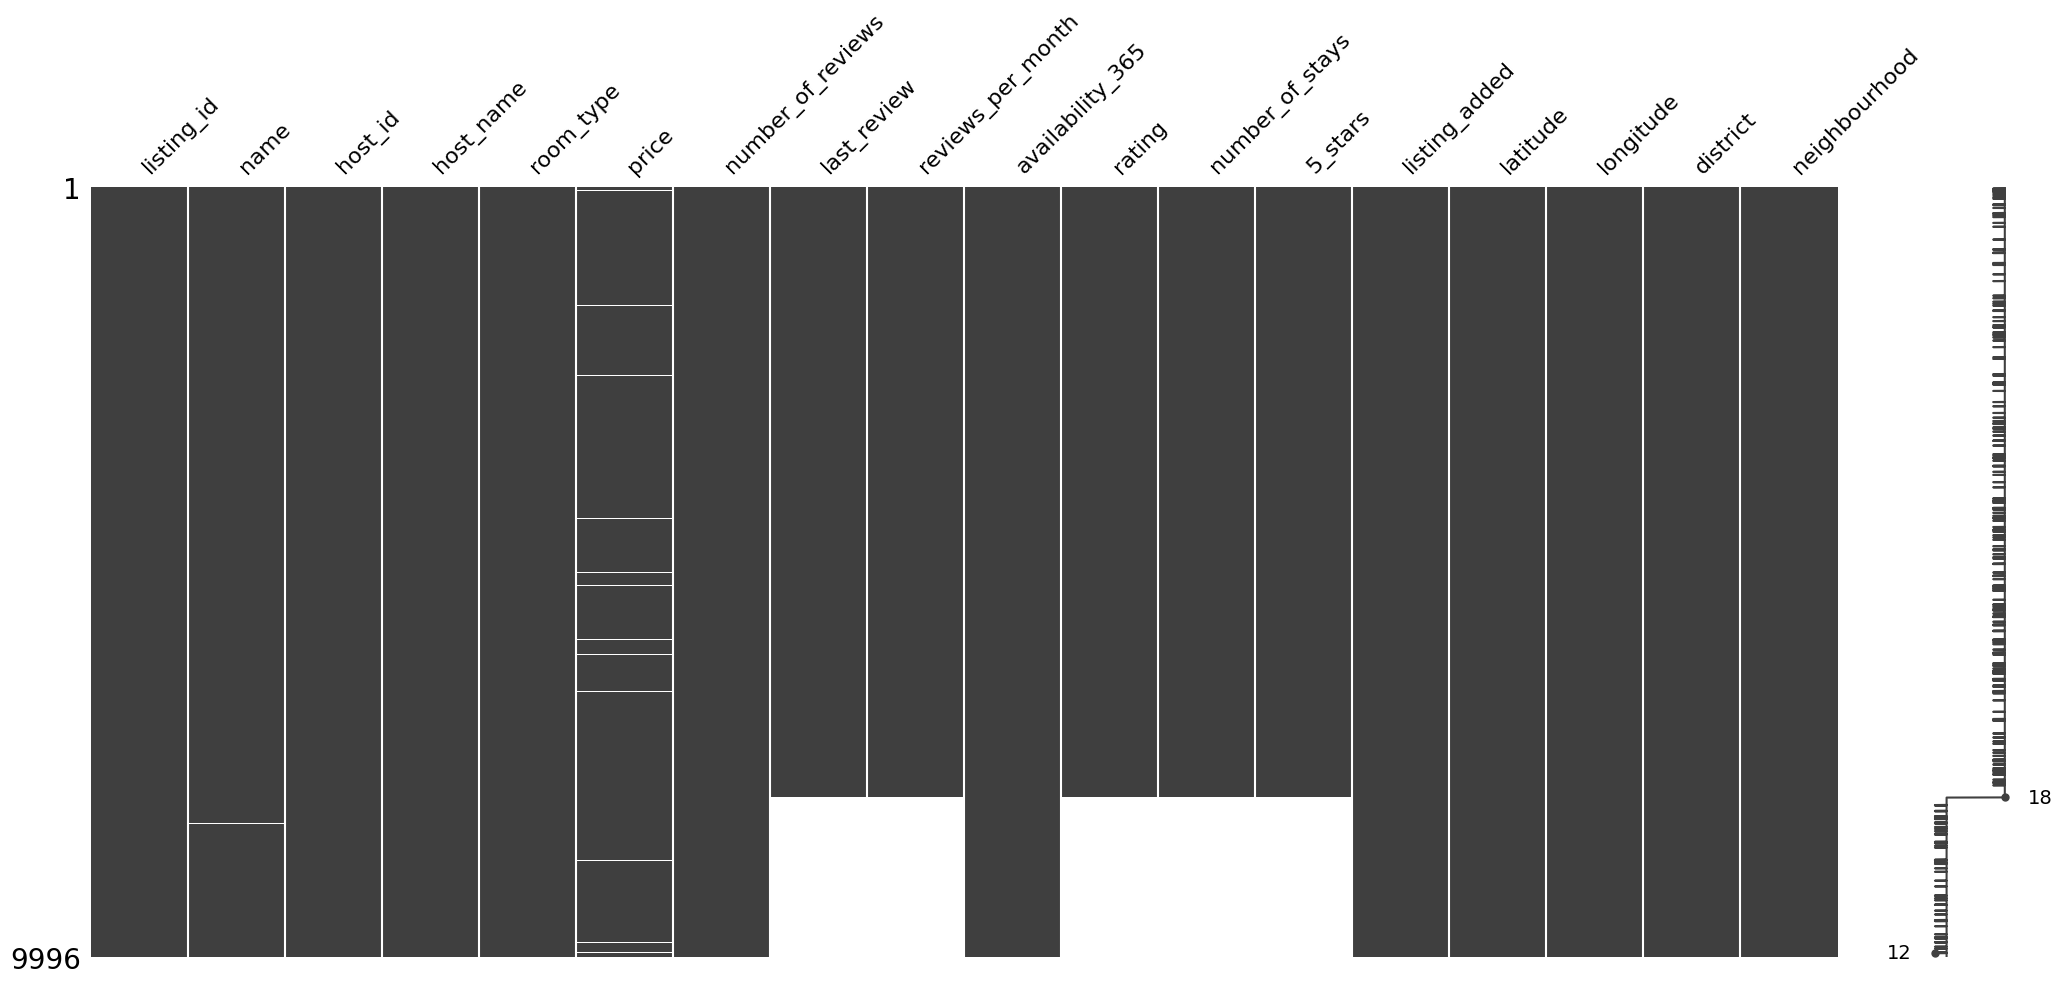

In [ ]:
import missingno as msno
msno.matrix(df.sort_values(by = 'rating'))

#### Tratando os faltantes da coluna `price`

In [ ]:
df[df['price'].isna()].describe()

,listing_id,host_id,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,is_rated
count,2.380000e+02,2.380000e+02,0.0,238.000000,191,238.000000,238.000000,191.000000,238.000000,238.000000,238,238.000000,238.000000,238.000000
mean,1.805656e+07,6.262965e+07,NaN,22.445378,2018-10-18 04:31:24.816753920,1.117563,98.953782,4.078343,26.934454,0.577721,2018-04-22 11:47:53.949579776,40.727270,-73.946071,0.802521
min,8.092400e+04,1.145900e+05,NaN,0.000000,2015-08-11 00:00:00,0.000000,0.000000,3.007359,0.000000,0.000000,2015-02-05 00:00:00,40.581980,-74.160620,0.000000
25%,8.282298e+06,6.034050e+06,NaN,1.000000,2018-07-10 12:00:00,0.080000,0.000000,3.646496,1.200000,0.613462,2018-02-26 00:00:00,40.688043,-73.970362,1.000000
50%,1.863600e+07,2.809524e+07,NaN,6.000000,2019-05-20 00:00:00,0.350000,23.000000,4.149203,7.200000,0.681884,2018-08-30 00:00:00,40.719925,-73.951370,1.000000
75%,2.753759e+07,1.009006e+08,NaN,26.000000,2019-06-24 00:00:00,1.435000,192.000000,4.538671,31.200000,0.746239,2018-12-17 18:00:00,40.762030,-73.927908,1.000000
max,3.638875e+07,2.668265e+08,NaN,207.000000,2019-07-08 00:00:00,8.870000,365.000000,4.957646,248.400000,0.934979,2019-01-02 00:00:00,40.870390,-73.734620,1.000000
std,1.065176e+07,7.518785e+07,NaN,35.798003,NaN,1.666262,125.872256,0.568705,42.957603,0.297066,NaN,0.057426,0.048688,0.398936


In [ ]:
df[~df['price'].isna()].describe()

,listing_id,host_id,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,is_rated
count,9.758000e+03,9.758000e+03,9758.000000,9758.000000,7734,9758.000000,9758.000000,7734.000000,9758.000000,9758.000000,9758,9758.000000,9758.000000,9758.000000
mean,1.929749e+07,6.811297e+07,150.658434,22.473765,2018-10-06 12:52:41.520558848,1.072952,112.639168,4.012199,26.968518,0.569461,2018-04-16 23:03:37.667555072,40.729187,-73.952037,0.792580
min,3.831000e+03,2.787000e+03,0.000000,0.000000,2011-03-28 00:00:00,0.000000,0.000000,3.000633,0.000000,0.000000,2010-09-22 00:00:00,40.508680,-74.239860,0.000000
25%,9.696668e+06,7.943414e+06,69.000000,1.000000,2018-07-16 00:00:00,0.040000,0.000000,3.518918,1.200000,0.611644,2018-03-08 00:00:00,40.689912,-73.983037,1.000000
50%,2.011647e+07,3.167959e+07,106.000000,5.000000,2019-05-19 00:00:00,0.370000,45.000000,4.024223,6.000000,0.681852,2018-09-09 00:00:00,40.723095,-73.955570,1.000000
75%,2.937679e+07,1.074344e+08,179.000000,22.000000,2019-06-23 00:00:00,1.550000,227.750000,4.514173,26.400000,0.750110,2018-12-14 00:00:00,40.763515,-73.936165,1.000000
max,3.648724e+07,2.741034e+08,8000.000000,510.000000,2019-07-08 00:00:00,16.220000,365.000000,4.999561,612.000000,0.939950,2020-10-23 00:00:00,40.913060,-73.719280,1.000000
std,1.095306e+07,7.871093e+07,204.677511,43.360639,NaN,1.537514,131.777824,0.574812,52.032767,0.299868,NaN,0.054589,0.045837,0.405479


Por um senso de negócio, podemos considerar que o preço depende majoritariamente do `room_type`.

In [ ]:
df.groupby('room_type')['price'].median()

room_type
Entire place    163.0
Private Room     70.0
Shared room      50.0
Name: price, dtype: float64

In [ ]:
df['price'].fillna(df.groupby('room_type')['price'].transform('median'), inplace = True)

In [ ]:
df.isna().sum()

listing_id              0
name                    5
host_id                 0
host_name               2
room_type               0
price                   0
number_of_reviews       0
last_review          2071
reviews_per_month       0
availability_365        0
rating               2071
number_of_stays         0
5_stars                 0
listing_added           0
latitude                0
longitude               0
district                0
neighbourhood           0
is_rated                0
dtype: int64

### Alguns outros Sanity Checks

In [ ]:
inconsistent_dates = df[df['listing_added'].dt.date > df['last_review'].dt.date]
inconsistent_dates

,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,district,neighbourhood,is_rated
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,Private Room,160.0,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23,40.71884,-73.98354,Manhattan,Lower East Side,1
50,20783900,Marvelous Manhattan Marble Hill Private Suites,148960265,Randy,Private Room,93.0,7,2018-10-06,0.32,0,4.868036,8.4,0.609263,2020-02-17,40.87618,-73.91266,Manhattan,Marble Hill,1
60,1908852,Oversized Studio By Columbus Circle,684629,Alana,Entire place,189.0,7,2016-05-06,0.13,0,4.841204,8.4,0.725995,2017-09-17,40.77060,-73.98919,Manhattan,Upper West Side,1
124,28659894,Private bedroom in prime Bushwick! Near Trains!!!,216235179,Nina,Private Room,55.0,4,2019-04-12,0.58,358,4.916252,4.8,0.703117,2020-08-23,40.69988,-73.92072,Brooklyn,Bushwick,1
511,33619855,Modern & Spacious in trendy Crown Heights,253354074,Yehudis,Entire place,150.0,6,2019-05-27,2.50,148,3.462432,7.2,0.610929,2020-10-07,40.66387,-73.93840,Brooklyn,Crown Heights,1
521,25317793,Awesome Cozy Room in The Heart of Sunnyside!,136406167,Kara,Private Room,65.0,22,2019-06-11,1.63,131,4.442485,26.4,0.722388,2020-10-22,40.74090,-73.92696,Queens,Sunnyside,1


In [ ]:
df.drop(inconsistent_dates.index, inplace = True)

## **Análise Exploratória**

Tente responder as seguintes perguntas:

- Qual o preço médio por bairro?
- Qual a disponibilidade média por bairro?
- Qual o preço médio por tipo de quarto?
- Visualize a série histórica da quantidade de acomodações
